# 复习

05 里面说了: torchvision.datasets.MNIST 的加载和读取 （转换成PIL Image 格式 在list 里面查看）

# 本节
1. torchvision.transforms 里面的常用转换操作
2. 对于之前读取到的 PIL.Image 的对象。在模型训练阶段，需要传入 Tensor 类型的数据，神经网络才能进行运算 transforms.ToTensor() 可以将 PIL.Image 转换成 Tensor。反之 transforms.ToPILImage(mode=None) 可以将 Tensor 转换成 PIL.Image 对象 mode 参数指定图像的模式，比如 'RGB' 的 mode 是 3， 'L' 的 mode 是 1。
3. torchvision.transforms 还提供了一些常用的图像增强操作，比如随机裁剪、水平翻转、颜色抖动等。这些操作可以通过组合不同的转换来实现数据增强，提高模型的泛化能力。

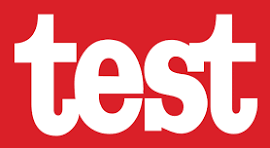

<class 'PIL.PngImagePlugin.PngImageFile'>


In [58]:
from PIL import Image
from torchvision import transforms

img = Image.open('test.png')
display(img)
print(type(img))

<class 'torch.Tensor'>


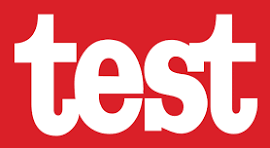

<class 'PIL.Image.Image'>


In [59]:
img1 = transforms.ToTensor()(img) #torch.Tensor device is cuda:0
print(type(img1))

img2 = transforms.ToPILImage()(img1) #PIL.Image.Image
display(img2)
print(type(img2))

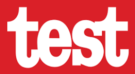

In [60]:
# resize
# interpolation 参数指定插值方法，0-最近邻插值，1-双线性插值，2-双三次插值，3-兰索斯插值
resize_transform = transforms.Resize((img.size[1]//2, img.size[0]//2), interpolation=2)
resized_img = resize_transform(img)
display(resized_img)

In [61]:
# 裁剪

# CenterCrop 中心裁剪
center_crop = transforms.CenterCrop((100, 100))
cropped_img = center_crop(img)
# display(cropped_img)


# RandomCrop 随机裁剪
random_crop = transforms.RandomCrop((100, 100))
cropped_img = random_crop(img)
# display(cropped_img)

# FiveCrop 五点裁剪
five_crop = transforms.FiveCrop((100, 100))
cropped_imgs = five_crop(img)
# for i, cropped_img in enumerate(cropped_imgs):
#     display(cropped_img)



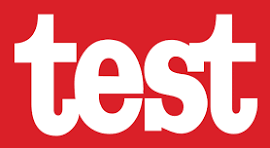

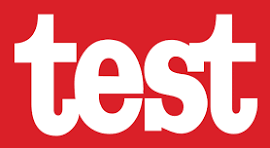

In [62]:
# 翻转
# RandomHorizontalFlip 随机水平翻转
horizontal_flip = transforms.RandomHorizontalFlip(p=0.5)
flipped_img = horizontal_flip(img)
display(flipped_img)

# RandomVerticalFlip 随机垂直翻转
vertical_flip = transforms.RandomVerticalFlip(p=0.5)
flipped_img = vertical_flip(img)
display(flipped_img)


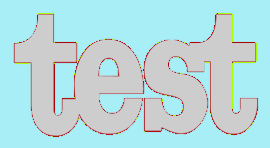

Image mean: [0.5, 0.5, 0.5]
Image std: [0.5, 0.5, 0.5]
<class 'torch.Tensor'>


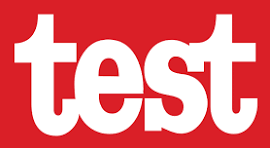

<class 'torch.Tensor'>


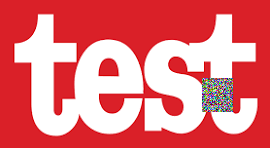

<class 'torch.Tensor'>


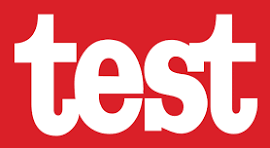

<class 'torch.Tensor'>


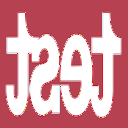

In [68]:
# 只对 Tensor 进行变换目前版本的 Torchvision（v0.10.0）对各种图像变换操作已经基本同时支持 PIL Image 和 Tensor 类型了，
# 因此只针对 Tensor 的变换操作很少，只有 4 个，
# 分别是 LinearTransformation（线性变换）、Normalize（标准化）、RandomErasing（随机擦除）、ConvertImageDtype（格式转换）。

# LinearTransformation
# 线性变换，形式为 y = Ax + b，其中 A 是一个矩阵，b 是一个偏置向量。
# 这里我们用一个简单的例子，给图像的每个像素值加上一个常数偏置 50。
linear_transform = transforms.Lambda(lambda x: x + 50)
transformed_img = linear_transform(img1)
display(transforms.ToPILImage()(transformed_img))

from numpy import mean, std
import torch

# Normalize
# 标准化，通常用于对图像进行归一化处理，使其均值为 0，标准差为 1。
# mean [0.5, 0.5, 0.5] std [0.5, 0.5, 0.5] 表示对每个通道分别进行归一化处理
# we can calculate mean and std of the dataset first
# image_mean = mean(img1.numpy(), axis=(1, 2))
# image_std = std(img1.numpy(), axis=(1, 2))
image_mean = [0.5, 0.5, 0.5]
image_std = [0.5, 0.5, 0.5]
print("Image mean:", image_mean)
print("Image std:", image_std)
normalize_transform = transforms.Normalize(mean=image_mean, std=image_std)
normalized_img = normalize_transform(img1)
# denormalize
image_mean_torch = torch.tensor(image_mean, device=img1.device)[:, None, None]
image_std_torch = torch.tensor(image_std, device=img1.device)[:, None, None]
denormalized_img = normalized_img * image_std_torch + image_mean_torch
print(type(denormalized_img))
display(transforms.ToPILImage()(denormalized_img))

# RandomErasing
# 随机擦除，在图像上随机选择一个区域，并将其像素值设置为随机值或固定值。
random_erasing = transforms.RandomErasing(p=1.0, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
erased_img = random_erasing(img1)
print(type(erased_img))
display(transforms.ToPILImage()(erased_img))

# ConvertImageDtype
# 格式转换，将图像从一种数据类型转换为另一种数据类型。
convert_dtype = transforms.ConvertImageDtype(torch.uint8)
converted_img = convert_dtype(img1)
print(type(converted_img))
display(transforms.ToPILImage()(converted_img))

# Compose 组合操作
composed_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=image_mean, std=image_std)
])
transformed_img = composed_transform(img)
print(type(transformed_img))
display(transforms.ToPILImage()(transformed_img))

In [ ]:
# 结合 datasets 使用

from torchvision import transforms
from torchvision import datasets

# 灰度图（单通道）: transforms.Normalize(mean=[0.5], std=[0.5])
# RGB图（3通道）: transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
# 你自己根据图片算出的 mean/std（C,H,W）

my_transform = transforms.Compose([transforms.ToTensor(), 
                                   transforms.Normalize((0.5), (0.5)) ,
                                   transforms.RandomErasing(p=1.0, scale=(0.02, 0.33), ratio=(0.3, 3.3), value='random')
                                   ])

mnist_dataset = datasets.MNIST(root='./data', train=True, transform=my_transform, target_transform=None, download=True)
# print(mnist_dataset)

item = mnist_dataset[0]
print(type(item))
display(transforms.ToPILImage()(item[0]))
print("Image label is:", item[1])

<class 'tuple'>


Image label is: 5


Torchvision 中 transforms 模块的作用是什么？
transforms 模块提供了一系列用于图像预处理和数据增强的转换操作，方便用户对图像数据进行各种变换，以适应模型训练的需求。

对于归一化，医学应用的归一化mean std 权重可以微调之后使用

![权重计算方法](mdfiles/image2.png)